In [6]:
import pandas as pd

# Load the uploaded CSV files
gddp_data = pd.read_csv('gddp_data.csv')
ntl_data = pd.read_csv('ntl_data.csv')

# Display the first few rows of each dataset to understand their structure
gddp_data_head = gddp_data.head()
ntl_data_head = ntl_data.head()

gddp_data_head, ntl_data_head

(             year     1999     2000     2001     2002     2003     2004  \
 0  24-Parganas(N)  1556252  1565724  1565724  1575196  1584668  1594140   
 1  24-Parganas(S)  1083200  1164244  1164244  1245288  1326332  1407376   
 2        Adilabad   346328   374269   420940   409929   478185   454280   
 3            Agra   454501   437274   459793   505860   542166   591591   
 4       Ahmedabad   781700  1399650  2017600  2635550  3253500  3871450   
 
       2005     2006     2007     2008     2009     2010     2011     2012  \
 0  1603612  1613084  1622556  1632028  1641500  1650972  1660444  1669916   
 1  1488420  1569464  1650508  1731552  1812596  1893640  1974684  2055728   
 2   529286   597431   665576   679695   655734   725918   773474   788584   
 3   630936   733828   836721   927423   985205  1045621  1134794  1207972   
 4  4489400  5107350  5725300  6343250  7159630  7820030  8573180  9422900   
 
        2013  
 0   1679388  
 1   2136772  
 2    805135  
 3   1285244

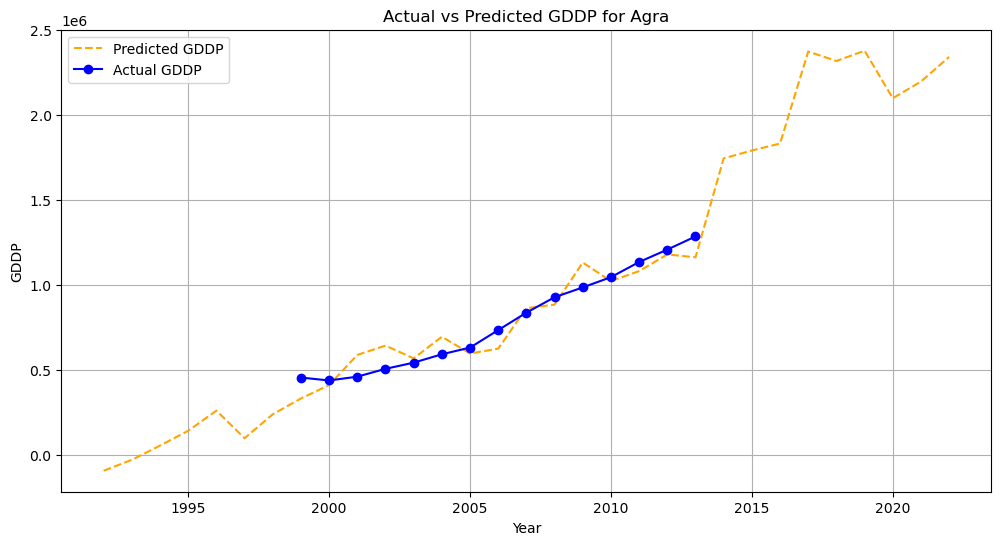

In [11]:
# Linear Regression Model


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the datasets
gddp_data = pd.read_csv('gddp_data.csv')
ntl_data = pd.read_csv('ntl_data.csv')

# Renaming columns for consistency
gddp_data.columns = ['district'] + list(range(1999, 2014))
ntl_data.columns = ['district'] + list(range(1992, 2023))

# Merging data on 'district' column
merged_data = pd.merge(gddp_data, ntl_data, on='district', how='inner', suffixes=('_gddp', '_ntl'))

# Renaming columns in the merged data to ensure consistency
gddp_years = list(range(1999, 2014))
ntl_years_for_gddp = gddp_years  # to match with GDDP years for training
merged_data.columns = ['district'] + [f"{year}_gddp" for year in gddp_years] + [f"{year}_ntl" for year in range(1992, 2023)]

# Function to extrapolate GDDP using linear regression model
def extrapolate_gddp(district_data):
    # Extract training data (NTL and GDDP for 1999-2013)
    ntl_train = district_data[[f"{year}_ntl" for year in ntl_years_for_gddp]].values.reshape(-1, 1)
    gddp_train = district_data[[f"{year}_gddp" for year in gddp_years]].values
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(ntl_train, gddp_train)
    
    # Predict GDDP for the full NTL range (1992-2022)
    ntl_full_range = district_data[[f"{year}_ntl" for year in range(1992, 2023)]].values.reshape(-1, 1)
    gddp_pred = model.predict(ntl_full_range)
    
    return gddp_pred.flatten()

# Predicting GDDP for all districts
predicted_gddp = {}
for index, row in merged_data.iterrows():
    district_name = row['district']
    predicted_gddp[district_name] = extrapolate_gddp(row)

# Convert predictions to a DataFrame
predicted_gddp_df = pd.DataFrame(predicted_gddp, index=range(1992, 2023))

# Plotting for a sample district (e.g., "Agra")
sample_district = "Agra"

# Extract actual and predicted GDDP values for plotting
actual_years = range(1999, 2014)
predicted_years = range(1992, 2023)
actual_gddp_values = merged_data.loc[merged_data['district'] == sample_district, [f"{year}_gddp" for year in actual_years]].values.flatten()
predicted_gddp_values = predicted_gddp_df[sample_district].values

# Plotting the actual vs predicted GDDP values
plt.figure(figsize=(12, 6))
plt.plot(predicted_years, predicted_gddp_values, label='Predicted GDDP', linestyle='--', color='orange')
plt.plot(actual_years, actual_gddp_values, label='Actual GDDP', marker='o', color='blue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('GDDP')
plt.title(f'Actual vs Predicted GDDP for {sample_district}')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Calculate the correlation between NTL and GDDP for the available years (1999-2013) across all districts

# Initializing lists to collect NTL and GDDP values for correlation calculation
all_ntl_values = []
all_gddp_values = []

# Loop through each district and gather NTL and GDDP data for 1999-2013
for index, row in merged_data.iterrows():
    ntl_values = row[[f"{year}_ntl" for year in gddp_years]].values
    gddp_values = row[[f"{year}_gddp" for year in gddp_years]].values
    
    # Append these values to the lists
    all_ntl_values.extend(ntl_values)
    all_gddp_values.extend(gddp_values)

# Calculate the Pearson correlation coefficient between NTL and GDDP
correlation = np.corrcoef(all_ntl_values, all_gddp_values)[0, 1]
correlation

0.5987773328848864

In [13]:
from sklearn.metrics import r2_score

# Collect all actual and predicted values for GDDP (for 1999-2013) across all districts to compute the R-squared
all_actual_values = []
all_predicted_values = []

# Calculate predictions for the 1999-2013 period and collect actual and predicted GDDP values
for index, row in merged_data.iterrows():
    district_name = row['district']

    # Prepare NTL data for 1999-2013 (training period) for the district
    ntl_train = row[[f"{year}_ntl" for year in gddp_years]].values.reshape(-1, 1)
    gddp_train = row[[f"{year}_gddp" for year in gddp_years]].values

    # Train linear regression model on the district's data
    model = LinearRegression()
    model.fit(ntl_train, gddp_train)

    # Predict GDDP for the same period (1999-2013)
    gddp_pred = model.predict(ntl_train)

    # Append to the lists of actual and predicted values
    all_actual_values.extend(gddp_train)
    all_predicted_values.extend(gddp_pred)

# Calculate the R-squared value for the model across all districts
r_squared = r2_score(all_actual_values, all_predicted_values)
r_squared

0.8965724662315254

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# Load data (replace with your data paths if necessary)
gddp_data = pd.read_csv('gddp_data.csv')
ntl_data = pd.read_csv('ntl_data.csv')

# Rename columns for consistency
gddp_data.columns = ['district'] + list(range(1999, 2014))
ntl_data.columns = ['district'] + list(range(1992, 2023))

# Merge datasets on 'district' to align GDDP with NTL data
merged_data = pd.merge(gddp_data, ntl_data, on='district', how='inner', suffixes=('_gddp', '_ntl'))

# Define years for training (GDDP data years)
gddp_years = list(range(1999, 2014))

# Initialize the XGBoost Regressor with a reasonable configuration
xgb_model = XGBRegressor(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    objective='reg:squarederror',
    random_state=42,
    verbosity=1
)

# Initialize a list to store R-squared scores from cross-validation
cv_scores_xgb = []

# Loop through each district, perform cross-validation with the XGBoost model
for index, row in merged_data.iterrows():
    district_name = row['district']
    
    # Prepare training data (1999-2013) for each district
    ntl_train = row[[f"{year}_ntl" for year in gddp_years]].values.reshape(-1, 1)
    gddp_train = row[[f"{year}_gddp" for year in gddp_years]].values
    
    # Perform cross-validation (5-fold) on the training data
    scores = cross_val_score(xgb_model, ntl_train, gddp_train, cv=5, scoring='r2')
    
    # Append mean R-squared score for this district
    cv_scores_xgb.append(scores.mean())

# Calculate the average R-squared score across all districts
average_cv_r2_score_xgb = np.mean(cv_scores_xgb)
print("Average Cross-Validation R-squared for XGBoost model:", average_cv_r2_score_xgb)

Average Cross-Validation R-squared for XGBoost model: -2663.274436901569
